# Perkenalan

Nama: Aisya Rafa Maharani

Dataset: Dataset yang digunakan adalah insurance.csv yang berisi informasi mengenai orang-orang yang memiliki asuransi, baik informasi terkait umur, jenis kelamin, data BMI, dll. Dataset ini memiliki kolom sebanyak 7 dan memiliki baris sebanyak 1338.

Objective: Program ini dibuat untuk memudahkan seseorang dalam memprediksi biaya asuransi kesehatan per tahun, dengan menggunakan model machine learning yaitu supervised learning, dengan metodenya adalah linear regression. Proses yang dilakukan untuk prediksi dimulai dari import libraries yang akan digunakan, kemudian data loading, EDA, feature engineering, model definition, model training, model evaluation, model saving, dan model inference. Setelah itu akan didapatkan kesimpulan mengenai prediksi biaya asuransi kesehatan per tahun.

# Import Libraries

In [67]:
# Mengimport pandas untuk membaca data csv dan untuk memanipulasi data
import pandas as pd
# Mengimport seaborn untuk membuat visualisasi data
import seaborn as sns
# Mengimport matplotlib.pyplot untuk membuat grafik dan plot
import matplotlib.pyplot as plt
# Mengimport train_test_split untuk membagi dataset menjadi data train dan test
from sklearn.model_selection import train_test_split
# Import Winsorizer untuk handling outlier
from feature_engine.outliers import Winsorizer
# Mengimport stats untuk melihat korelasi antar variabel
from scipy import stats
# Import numpy untuk perhitungan
import numpy as np
# Mengimport scaler untuk melakukan scaling
from sklearn.preprocessing import StandardScaler
# Mengimport OneHotEncoder untuk melakukan encoding
from sklearn.preprocessing import OneHotEncoder
# Mengimport OrdinalEncoder untuk melakukan encoding
from sklearn.preprocessing import OrdinalEncoder
# Mengimport LinearRegression untuk memprediksi data
from sklearn.linear_model import LinearRegression
# Import libraries untuk evaluasi model
from sklearn.metrics import mean_squared_error, r2_score
# Imports pickle dan json untuk Menyimpan files
import pickle
import json
# Import variance_inflation_factor untuk melihat hubungan antar feature untuk asumsi nomer 2
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Import statsmodels untuk menampilkan QQ plot
import statsmodels.api as sm
# Mengimport durbin_watson untuk melakukan Durbin-Watson test
from statsmodels.stats.stattools import durbin_watson

# Data Loading

In [68]:
# Menggunakan pandas untuk membaca data csv dan memasukkannya ke dalam variabel data
data = pd.read_csv('insurance.csv')

In [69]:
# Melihat isi dari tabel data secara keseluruhan
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [70]:
# Melihat 5 data pertama dari tabel data
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [71]:
# Melihat 5 data terakhir dari tabel data
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [72]:
# Duplicate Dataset
data_duplicate = data.copy()

In [73]:
# Melihat jumlah kolom dari tabel data dan menampilkannya
print(f'Jumlah kolom dari tabel data adalah: {len(data.columns)}')
# Melihat jumlah baris dari tabel data dan menampilkannya
print(f'Jumlah baris dari tabel data adalah: {len(data)}')

Jumlah kolom dari tabel data adalah: 7
Jumlah baris dari tabel data adalah: 1338


In [74]:
# Melihat tipe data dan jumlah missing value dari semua kolom
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Tidak terdapat missing value pada semua kolom. Tipe data dari tabel data adalah float sebanyak 2 kolom, integer sebanyak 2 kolom, dan object atau string sebanyak 3 kolom.

In [75]:
# Melihat data statistik dari tabel data secara keseluruhan
data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


data.describe(include='all') dapat menampilkan semua jenis data, baik yang object maupun integer. Pada data yang bertipe object, data statistiknya akan bernilai NaN, dan hanya akan menampilkan data unique value, top value, dan freq value. Sementara untuk data yang bertipe integer akan menghasilkan data statistik seperti mean, max, dll, sementara data unique value, top value, dan freq value akan bernilai NaN.

Tabel data memiliki 1338 baris. Dapat dilihat bahwa usia terkecil dari orang yang memiliki asuransi adalah 18 tahun dan usia tertinggi adalah 64 tahun. Para pemilik asuransi kebanyakan adalah pria, dapat dilihat pada kolom sex, top nya adalah male. Nilai BMI rata-rata dari pemilik asuransi adalah 30.663397 yang berarti rata-rata pemilik asuransi adalah overweight. Rata-rata pemilik asuransi memiliki 1 anak, dengan anak terbanyak adalah 5 dan terdikit adalah tidak memiliki anak. Pemilik asuransi kebanyakan tidak merokok dan kebanyakan bertempat tinggal di daerah southeast. Biaya kesehatan pemilik asuransi tertinggi adalah sebesar 63770.428010 dan terendah adalah 1121.873900, dengan rata-rata nya adalah 13270.422265.

# Exploratory Data Analysis (EDA)

In [76]:
# Melihat isi dari tabel data secara keseluruhan
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Klasifikasi Overweight

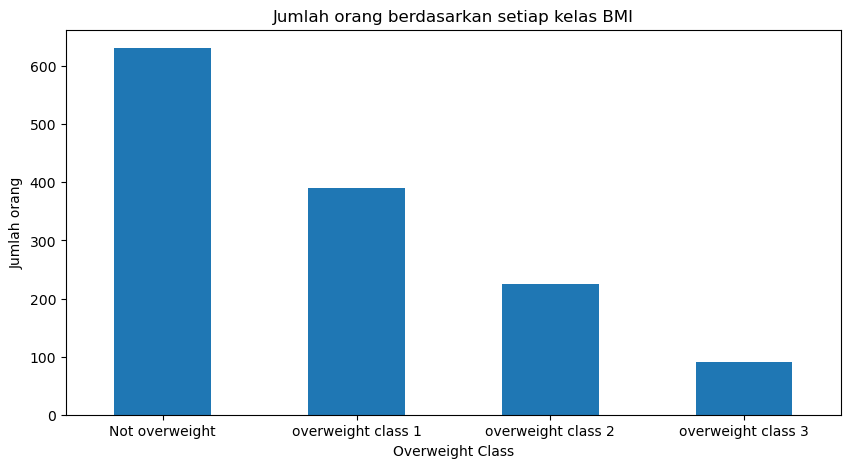

In [77]:
# Membuat fungsi untuk mengklasifikasikan overweight
def categories_bmi(bmi):
    '''
    Fungsi categories_bmi berguna untuk mengklasifikasikan
    berat badan seseorang kedalam kelas-kelas overweight
    '''

    if 30 <= bmi < 35:
        return 'overweight class 1'
    elif 35 <= bmi < 40:
        return 'overweight class 2'
    elif bmi >= 40:
        return 'overweight class 3'
    else:
        return 'Not overweight'
    
# Menghitung jumlah tiap kelasnya tanpa membuat kolom baru pada tabel data
bmi_categories = data['bmi'].apply(categories_bmi)
bmi_count = bmi_categories.value_counts().sort_values(ascending=False)

# Membuat visualisasi untuk bmi category
plt.figure(figsize=(10,5))
bmi_count.plot(kind='bar')
plt.title('Jumlah orang berdasarkan setiap kelas BMI')
plt.xlabel('Overweight Class')
plt.ylabel('Jumlah orang')
plt.xticks(rotation=0)
plt.show()

Para pemilik asuransi kebanyakan tidak overweight, namun jumlah orang yang memiliki overweight kelas 1 juga lumayan banyak, maka dari itu perlu untuk diperhatikan.

## Melihat Populasi Data Kategorikal

In [78]:
# Melihat kolom mana saja yang bertipe object
kolom_object = data.dtypes[data.dtypes == 'object'].index.tolist()
kolom_object

['sex', 'smoker', 'region']

In [79]:
# Melihat jumlah unique value untuk kolom yang akan dianalisis
jumlah_unique = data[['sex', 'smoker', 'region']].nunique()
jumlah_unique

sex       2
smoker    2
region    4
dtype: int64

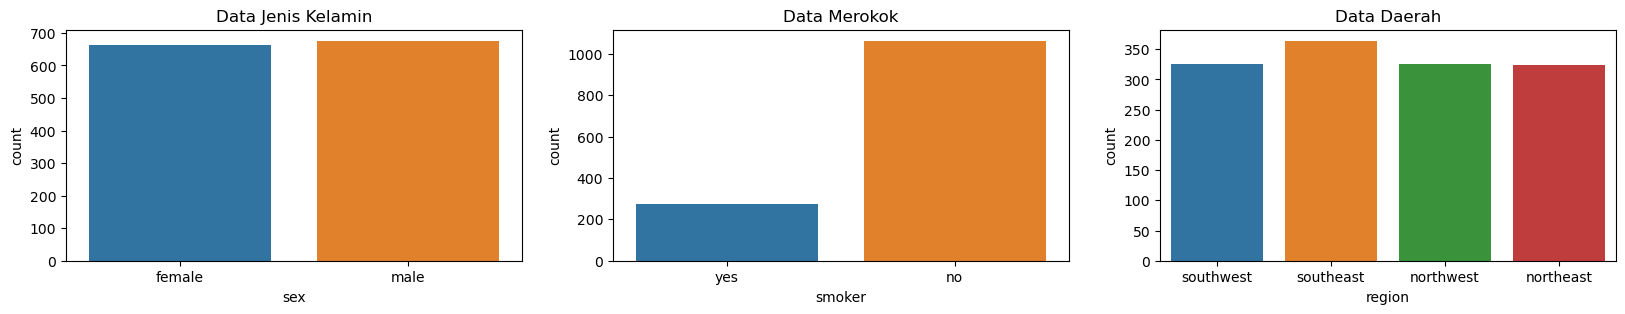

In [80]:
# Membuat subplot untuk kolom sex, smoker, dan region          
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 3))

# Membuat count plot untuk kolom cab_type
sns.countplot(data=data, x='sex', ax=axes[0])
sns.countplot(data=data, x='smoker', ax=axes[1])
sns.countplot(data=data, x='region', ax=axes[2])

# Memberikan judul untuk subplot
axes[0].set_title('Data Jenis Kelamin')
axes[1].set_title('Data Merokok')
axes[2].set_title('Data Daerah')

# Menampilkan plot
plt.show()

- Dari grafik data jenis kelamin, diketahui bahwa jenis kelamin pria lebih banyak dibandingkan dengan wanita.
- Dari grafik data merokok, diketahui bahwa lebih banyak orang yang tidak merokok.
- Dari grafik daerah, diketahui bahwa paling banyak orang dari daerah southeast.

## Klasifikasi Kolom Smoker Berdasarkan Kolom Sex

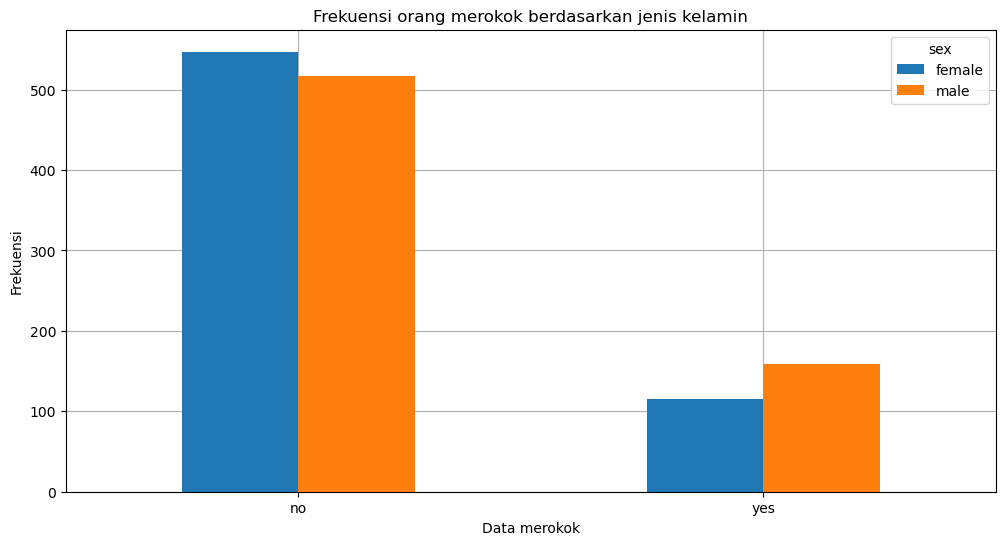

In [81]:
# Menghitung frekuensi kombinasi dari kolom smoker dan sex
grouped_data = data.groupby(['smoker', 'sex']).size().reset_index(name='counts')

# Menggunakan pivot untuk mengubah data yang digroupkan menjadi format
# yang sesuai untuk grouped bar chart
pivot_data = grouped_data.pivot(index='smoker', columns='sex', values='counts').fillna(0)

# Membuat grouped bar chart
ax = pivot_data.plot(kind='bar', figsize=(12, 6), zorder=2)

# Menambahkan label dan judul
ax.set_xlabel('Data merokok')
ax.set_ylabel('Frekuensi')
ax.set_title('Frekuensi orang merokok berdasarkan jenis kelamin')
ax.grid(zorder=1)

# Menampilkan grafik
plt.xticks(rotation=0)
plt.show()

Dari grafik frekuensi orang merokok berdasarkan jenis kelamin, diketahui bahwa orang yang merokok lebih banyak berjenis kelamin pria, dan orang yang tidak merokok lebih banyak yang berjenis kelamin wanita.

# Feature Engineering

## Handling Missing Value

In [82]:
# Melihat apakah ada missing value pada tabel data
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Tabel data tidak memiliki missing value pada semua kolom nya.

## Handling Cardinality

In [83]:
# Melihat unique value dari setiap kolom kategorik
pd.set_option('display.max_colwidth', None)

cat_cols = list(data.select_dtypes(include='object').columns)

listItem = []
for col in cat_cols:
  listItem.append([col, data[col].nunique(), data[col].unique()])

pd.DataFrame(columns=['Nama Kolom', 'Jumlah Unique Value', 'Nilai Unique'], data=listItem)

,Nama Kolom,Jumlah Unique Value,Nilai Unique
0,sex,2,"[female, male]"
1,smoker,2,"[yes, no]"
2,region,4,"[southwest, southeast, northwest, northeast]"


Karena semua kolom memiliki low cardinality, maka tidak perlu di handling.

## Mencari Korelasi antar Variabel

Karena variabel yang ingin dianalisis adalah variabel charges, maka variabel tersebut yang akan dicari korelasinya dengan variabel-variabel lain.

### Mencari korelasi variabel price dengan variabel kategorikal

In [84]:
# Melihat kolom mana saja yang bertipe object pada data
kolom_object = data.dtypes[data.dtypes == 'object'].index.tolist()
kolom_object

['sex', 'smoker', 'region']

Karena input nya adalah kolom-kolom yang bertipe kategorik dan output nya adalah kolom charges yang bertipe numerik, maka untuk mencari korelasi antara kolom charges dengan kolom-kolom lain, adalah dengan menggunakan kendall's correlation.

Kendall's Correlation:
- H0: Tidak ada korelasi antara kedua variabel.
- H1: Ada korelasi antara kedua variabel.

In [85]:
# Mencari korelasi antara kolom charges dengan sex
corr_tau, pval_k = stats.kendalltau(data['charges'], data['sex'])
print(f"tau-correlation: {corr_tau:.2f}, p-value: {pval_k}")

tau-correlation: 0.01, p-value: 0.7285979314958788


Karena nilai p-value nya adalah 0.7285979314958788, yaitu lebih dari 0.05, maka H0 diterima dan H1 ditolak, artinya tidak terdapat korelasi antara variabel charges dengan sex. Namun, dari nilai tau nya yaitu 0.01, artinya korelasinya sangat lemah dan hubungannya searah.

In [86]:
# Mencari korelasi antara kolom charges dengan smoker
corr_tau, pval_k = stats.kendalltau(data['charges'], data['smoker'])
print(f"tau-correlation: {corr_tau:.2f}, p-value: {pval_k}")

tau-correlation: 0.54, p-value: 5.2590182674985486e-130


Karena nilai p-value nya adalah 5.2590182674985486e-130, yaitu kurang dari 0.05, maka H0 ditolak dan H1 diterima, artinya terdapat korelasi antara variabel charges dengan smoker. Namun, dari nilai tau nya yaitu 0.54, artinya korelasinya cukup kuat dan hubungannya searah.

In [87]:
# Mencari korelasi antara kolom charges dengan region
corr_tau, pval_k = stats.kendalltau(data['charges'], data['region'])
print(f"tau-correlation: {corr_tau:.2f}, p-value: {pval_k}")

tau-correlation: -0.03, p-value: 0.11540770904943377


Karena nilai p-value nya adalah 0.11540770904943377, yaitu lebih dari 0.05, maka H0 diterima dan H1 ditolak, artinya tidak terdapat korelasi antara variabel charges dengan region. Namun, dari nilai tau nya yaitu -0.03, artinya korelasinya sangat lemah dan hubungannya berlawanan.

### Mencari korelasi variabel price dengan variabel numerikal

Input adalah kolom-kolom yang bertipe numerik dan output adalah kolom yang bertipe numerik (kolom charges), sehingga untuk mencari korelasi antara kolom charges dengan kolom lainnya, dapat menggunakan korelasi pearson.

In [88]:
# Melihat kolom-kolom yang numerik dari tabel data
data_numerik = data.select_dtypes(include=['float64', 'int64'])
data_numerik

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [89]:
# Menghitung matriks korelasi antara kolom-kolom yang numerik dari tabel data menggunakan data_numerik
data_numerik.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Dari nilai korelasi tersebut, dilihat bahwa nilai korelasi yang paling tinggi terhadap variabel charges adalah variabel age, yaitu bernilai 0.299008 dan variabel bmi, yaitu bernilai 0.198341.

### Kesimpulan

Variabel sex, region, dan children memiliki nilai korelasi yang rendah, maka variabel tersebut dapat di drop

## Feature Selection

In [90]:
# Menghapus kolom sex, region, dan children
data.drop(['sex', 'region', 'children'], axis=1, inplace=True)

In [91]:
# Melihat isi data secara keseluruhan
data

,age,bmi,smoker,charges
0,19,27.900,yes,16884.92400
1,18,33.770,no,1725.55230
2,28,33.000,no,4449.46200
3,33,22.705,no,21984.47061
4,32,28.880,no,3866.85520
...,...,...,...,...
1333,50,30.970,no,10600.54830
1334,18,31.920,no,2205.98080
1335,18,36.850,no,1629.83350
1336,21,25.800,no,2007.94500


Maka, kolom yang akan digunakan hanya age, bmi, smoker, dan charges.

## Spliting Data

In [92]:
# Melihat isi tabel data secara keseluruhan
data

,age,bmi,smoker,charges
0,19,27.900,yes,16884.92400
1,18,33.770,no,1725.55230
2,28,33.000,no,4449.46200
3,33,22.705,no,21984.47061
4,32,28.880,no,3866.85520
...,...,...,...,...
1333,50,30.970,no,10600.54830
1334,18,31.920,no,2205.98080
1335,18,36.850,no,1629.83350
1336,21,25.800,no,2007.94500


In [93]:
# Mendefinisikan X dan y
y = data[['charges']]
X = data.drop(['charges'], axis=1)

In [94]:
# Melihat ukuran dari data X dan y
print(f'Ukuran dari data X: {X.shape}')
print(f'Ukuran dari data y: {y.shape}')

Ukuran dari data X: (1338, 3)
Ukuran dari data y: (1338, 1)


In [95]:
# Splitting dataset menjadi data train dan test
# Training data sebanyak 70% dan testing data sebanyak 30%
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=15)

In [96]:
# Melihat ukuran dari data x_train, x_test, y_train, dan y_test
print(f'Ukuran dari data x_train: {x_train.shape}')
print(f'Ukuran dari data y_train: {y_train.shape}')
print(f'Ukuran dari data x_test: {x_test.shape}')
print(f'Ukuran dari data y_test: {y_test.shape}')

Ukuran dari data x_train: (936, 3)
Ukuran dari data y_train: (936, 1)
Ukuran dari data x_test: (402, 3)
Ukuran dari data y_test: (402, 1)


Splitting data berhasil dilakukan.

## Handling Outlier

In [97]:
# Melihat nilai skewness dari semua kolom numerik
num_cols = list(x_train.select_dtypes(exclude='object').columns)

listItem= []

for col in num_cols:
  listItem.append([col, x_train[col].skew()])

pd.DataFrame(columns=['Nama kolom', 'Nilai skewness'], data= listItem)

,Nama kolom,Nilai skewness
0,age,0.014678
1,bmi,0.292281


Karena kedua kolom memiliki distribusi normal, maka akan menggunakan metode gaussian.

In [98]:
# Capping untuk distribusi normal
winsoriser_normal = Winsorizer(capping_method='gaussian',
                            tail='both',
                            fold=3,
                            variables=['age', 'bmi'],
                            missing_values='ignore')

x_train = winsoriser_normal.fit_transform(x_train)
x_test = winsoriser_normal.transform(x_test)

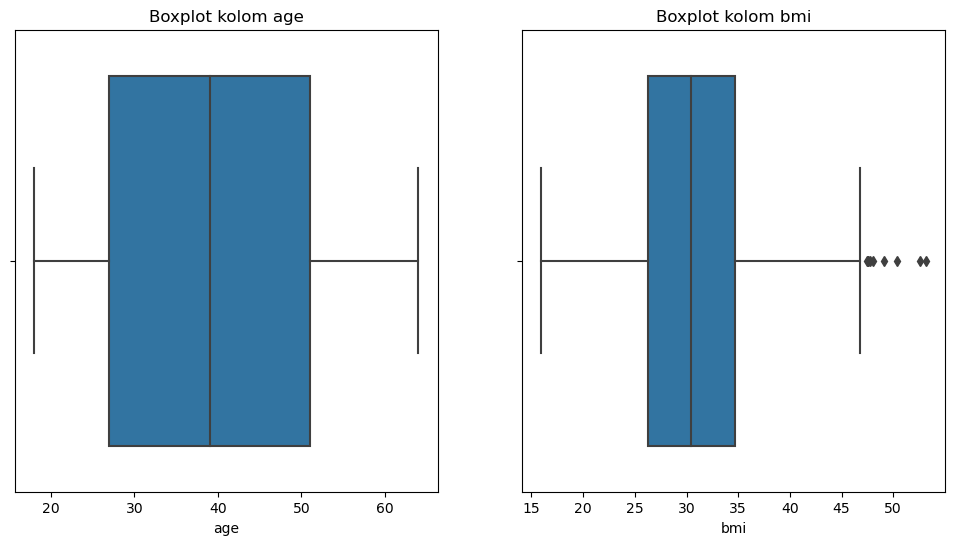

In [99]:
# Membuat plot untuk kolom age dan bmi
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.boxplot(x=data['age'], ax=axes[0])
sns.boxplot(x=data['bmi'], ax=axes[1])

axes[0].set_title('Boxplot kolom age')
axes[1].set_title('Boxplot kolom bmi')

# Menampilkan plot
plt.show()

Handling outlier berhasil dilakukan.

In [100]:
# Melihat jumlah baris dalam data train dan test
print(f'Jumlah baris dari x_train: {len(x_train)}')
print(f'Jumlah baris dari y_train: {len(y_train)}')
print(f'Jumlah baris dari x_test: {len(x_test)}')
print(f'Jumlah baris dari y_test: {len(y_test)}')

Jumlah baris dari x_train: 936
Jumlah baris dari y_train: 936
Jumlah baris dari x_test: 402
Jumlah baris dari y_test: 402


Ukuran data train dan test sudah sesuai.

## Split antara data kategorikal dan numerikal

In [101]:
# Melihat mana data numeric and categorical
num_columns = x_train.select_dtypes(include = np.number).columns.tolist()
cat_columns = x_train.select_dtypes(include = ['object']).columns.tolist()

print('Kolom Numerical: ', num_columns)
print('Kolom Categorical: ', cat_columns)

Kolom Numerical:  ['age', 'bmi']
Kolom Categorical:  ['smoker']


In [102]:
# Split numerical columns dan categorical columns
x_train_num = x_train[num_columns]
x_train_cat = x_train[cat_columns]

x_test_num = x_test[num_columns]
x_test_cat = x_test[cat_columns]

In [103]:
# Melihat isi dari data x_train_num
x_train_num

,age,bmi
525,18,33.880
183,44,26.410
821,26,17.670
1237,58,28.215
1185,45,23.560
...,...,...
1223,20,24.420
667,40,32.775
156,48,24.420
384,44,22.135


In [104]:
# Melihat isi dari data x_train_cat
x_train_cat

,smoker
525,no
183,no
821,no
1237,no
1185,no
...,...
1223,yes
667,yes
156,yes
384,no


In [105]:
# Melihat isi dari data x_test_num
x_test_num

,age,bmi
38,35,36.670
126,19,28.300
479,23,32.560
10,25,26.220
195,19,30.590
...,...,...
32,19,28.600
112,37,30.800
142,34,25.300
942,18,40.185


In [106]:
# Melihat isi dari data x_test_cat
x_test_cat

,smoker
38,yes
126,yes
479,no
10,no
195,no
...,...
32,no
112,no
142,yes
942,no


## Scaling

In [107]:
# Membuat variabel kolom numerik untuk menyimpan kolom-kolom yang bertipe numerik
# dari data x_train
kolom_numerik = x_train_num.columns.tolist()
kolom_numerik

['age', 'bmi']

In [108]:
# Melihat nilai skewness untuk kolom-kolom numerik pada data x_train
x_train_num[kolom_numerik].skew()

age    0.014678
bmi    0.250256
dtype: float64

Karena semua kolom memiliki distribusi normal, maka dapat menggunakan StandardScaler.

In [109]:
# Feature Scaling menggunakan StandardScaler
scaler = StandardScaler()
scaler.fit(x_train_num)

x_train_num_scaled = scaler.transform(x_train_num)
x_test_num_scaled = scaler.transform(x_test_num)

In [110]:
# Melihat isi dari data x_train_num_scaled
x_train_num_scaled

array([[-1.53133353,  0.52369218],
       [ 0.31254024, -0.70318356],
       [-0.96398775, -2.1386446 ],
       ...,
       [ 0.59621313, -1.03002195],
       [ 0.31254024, -1.40531125],
       [ 0.59621313,  0.01454696]])

In [111]:
# Melihat isi dari data x_test_num_scaled
x_test_num_scaled

array([[-3.25723756e-01,  9.81922881e-01],
       [-1.46041531e+00, -3.92769217e-01],
       [-1.17674242e+00,  3.06894862e-01],
       [-1.03490597e+00, -7.34389236e-01],
       [-1.46041531e+00, -1.66587143e-02],
       [-1.83887312e-01,  1.78317684e-02],
       [-1.03490597e+00, -1.62457217e+00],
       [ 3.12540241e-01,  1.21021703e+00],
       [ 2.88673531e-02, -2.19495601e-01],
       [-1.83887312e-01, -1.41481414e-01],
       [-1.53133353e+00,  1.01148615e+00],
       [-1.24766064e+00,  6.74793345e-01],
       [ 3.12540241e-01,  1.35639098e+00],
       [-1.17674242e+00,  1.98050448e+00],
       [-4.67560200e-01, -3.97696428e-01],
       [ 1.16355890e+00,  4.82632084e-01],
       [-1.12969091e-01, -1.87093276e+00],
       [-1.12969091e-01, -7.90700640e-02],
       [-1.24766064e+00,  1.04761904e+00],
       [ 9.97855750e-02,  1.49224084e-01],
       [-8.22151309e-01,  4.44856793e-01],
       [ 3.83458462e-01, -5.24161532e-01],
       [-1.10582420e+00, -6.40772212e-01],
       [ 1.

Scaling telah berhasil dilakukan.

## Encoding

Karena kolom kategorik smoker adalah kategorik nominal, maka menggunakan one hot encoding.

In [112]:
# One Hot Encoder untuk kolom smoker
onehot_encoder = OneHotEncoder(sparse=False)
x_train_encoded = onehot_encoder.fit_transform(x_train_cat[['smoker']])
x_test_encoded = onehot_encoder.transform(x_test_cat[['smoker']])

c:\Users\aisya\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [113]:
# Melihat isi dari data x_train_encoded
x_train_encoded

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [114]:
# Melihat isi dari data x_test_encoded
x_test_encoded

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.

Data sudah selesai di encoded. Data sudah siap digunakan untuk modeling.

In [115]:
# Concate Columns
x_train_final = np.concatenate([x_train_num_scaled, x_train_encoded], axis = 1)
x_test_final = np.concatenate([x_test_num_scaled, x_test_encoded], axis = 1)

In [116]:
# Melihat ukuran dari data train dan test
print(f'Ukuran data dari x_train: {x_train_final.shape}')
print(f'Ukuran data dari y_train: {y_train.shape}')
print(f'Ukuran data dari x_test: {x_test_final.shape}')
print(f'Ukuran data dari y_test: {y_test.shape}')

Ukuran data dari x_train: (936, 4)
Ukuran data dari y_train: (936, 1)
Ukuran data dari x_test: (402, 4)
Ukuran data dari y_test: (402, 1)


Ukuran dari data train dan test sudah benar.

# Asumsi-asumsi 1&2 Linear Regression

## Asumsi 1: Terdapat hubungan linear antara variabel dependen dan independen

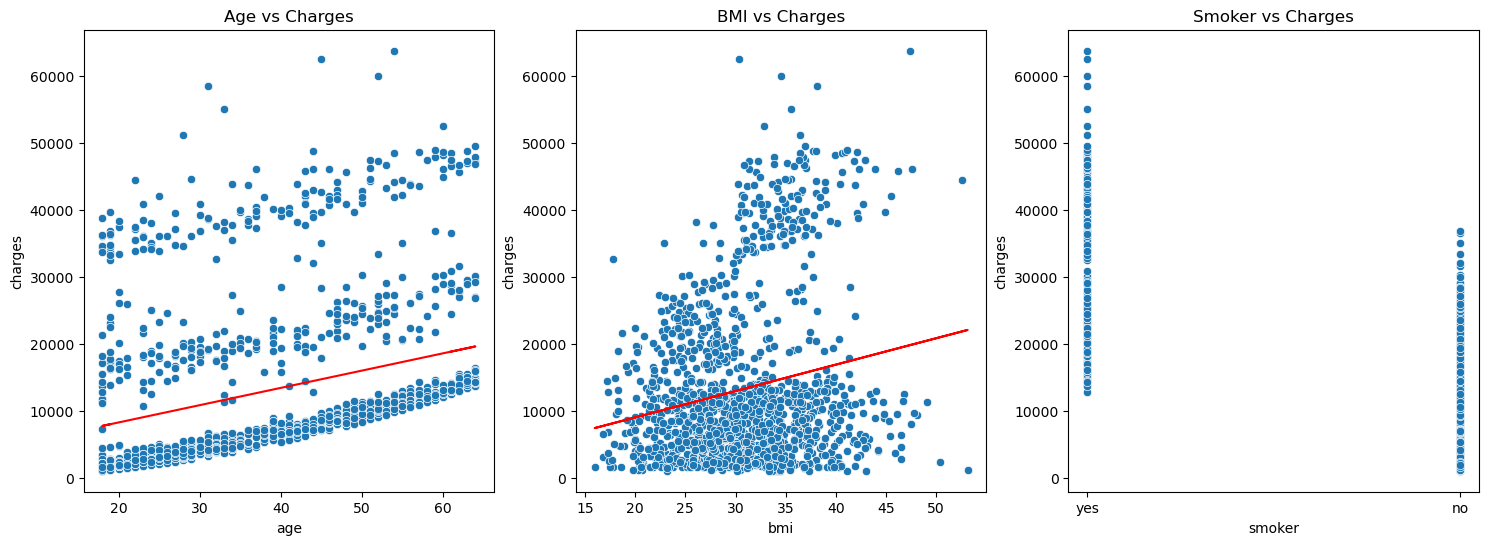

In [117]:
# Membuat subplot untuk variabel dependen dan independen dengan garis linear
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Scatter plot untuk kolom age dan charges
sns.scatterplot(ax=axes[0], data=data, x='age', y='charges')
coef_age = np.polyfit(data['age'], data['charges'], 1)
poly1d_fn_age = np.poly1d(coef_age) 
axes[0].plot(data['age'], poly1d_fn_age(data['age']), color="red")
axes[0].set_title('Age vs Charges')

# Scatter plot untuk kolom bmi dan charges
sns.scatterplot(ax=axes[1], data=data, x='bmi', y='charges')
coef_bmi = np.polyfit(data['bmi'], data['charges'], 1)
poly1d_fn_bmi = np.poly1d(coef_bmi) 
axes[1].plot(data['bmi'], poly1d_fn_bmi(data['bmi']), color="red")
axes[1].set_title('BMI vs Charges')

# Scatter plot untuk kolom smoker dan charges
sns.scatterplot(ax=axes[2], data=data, x='smoker', y='charges')
axes[2].set_title('Smoker vs Charges')

# Menampilkan plot
plt.show()

- Scatter plot pertama adalah hubungan antara umur dan biaya asuransi, menunjukkan hubungan positif antara umur dan biaya asuransi. Dengan bertambahnya umur, biaya asuransi cenderung meningkat. Namun, peningkatan ini tidak sepenuhnya linear karena terdapat dispersi yang cukup luas dalam biaya pada setiap kelompok umur, mengasumsikan bahwa terdapat kebijakan harga yang berbeda untuk kategori umur yang berbeda.

- Scatter plot kedua adalah hubungan antara BMI dan biaya asuransi, menunjukkan bahwa ada hubungan positif antara BMI dan biaya asuransi. Individu dengan BMI yang lebih tinggi cenderung mengalami peningkatan dalam biaya asuransi. Namun, hubungan ini tidak sepenuhnya linear dan terdapat variabilitas yang signifikan. Misalnya, untuk nilai BMI yang lebih tinggi, range biaya asuransi melebar.

- Scatter plot ketiga adalah hubungan antara status perokok dan biaya asuransi, sangat jelas bahwa status perokok memiliki pengaruh yang signifikan terhadap biaya asuransi. Perokok cenderung memiliki biaya asuransi yang jauh lebih tinggi dibandingkan dengan non-perokok.

Kesimpulannya, asumsi 1 tidak terpenuhi karena terdapat variabel yang non-linear

## Asumsi 2: Tidak terdapat feature yang saling berhubungan

In [118]:
# Membuat fungsi untuk menghitung Variance Inflation Factor
def calc_vif(X):
    '''
    Fungsi calc_vif berguna untuk menghitung Variance Inflation Factor,
    untuk melihat apakah terdapat korelasi antar feature.
    '''
    
    # Hanya memeriksa kolom numerik
    numerics = ['int64', 'float64']
    X = X.select_dtypes(include=numerics)
    
    vif_data = pd.DataFrame()
    vif_data["variables"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    return vif_data

# Melihat multicolinearity pada X
calc_vif(X)

,variables,VIF
0,age,7.457006
1,bmi,7.457006


Karena nilai VIF dari kedua variabel dibawah 10, maka tidak ada multicollinearity. Dapat disimpulkan bahwa asumsi 2 terpenuhi.

# Model Definition

Program ini menggunakan machine learning yang berjenis supervised learning, dengan modelnya yaitu linear regression. Supervised learning adalah jenis machine learning dimana model dilatih dengan dataset yang memiliki input atau feature dan output atau label/target yang sudah diketahui. Tujuan dari supervised learning adalah membuat model yang dapat memprediksi output dengan benar untuk input dari data baru, dimana prediksi tersebut didasarkan dari pengalaman selama proses latihan.

Linear regression adalah model supervised learning yang berjenis regresi, artinya model ini memprediksi nilai yang kontinu. Linear regression dapat mengatasi masalah regresi yang dapat menjelaskan hubungan antara satu variabel target dengan beberapa variabel feature dengan menggunakan persamaan linear.

Persamaan dari multiple linear regression:
yi = B0 + B1X1i + B2X2i + ... + BpXpi

- yi: Variabel dependen (target)
- B0: Intercept
- B1: Kemiringan (slope)
- X1i: Variabel independen (feature)
- p: Jumlah variabel bebas

Hyperparameter tidak digunakan pada model ini karena model ini hanya menggunakan default.

Pada data ini, dipilih model linear regression karena data ini memiliki hubungan linear, dimana linear regression efektif jika terdapat hubungan linear antara variabel independen dan variabel dependen. Dalam konteks prediksi charges, dapat diasumsikan bahwa perubahan pada feature (seperti age, sex, bmi, atau smoker) secara linear mempengaruhi charges. Model ini juga memberikan keuntungan dalam hal interpretasi. Koefisien yang dihasilkan dapat memberikan informasi mengenai seberapa besar perubahan charges yang diharapkan dengan satu unit perubahan pada variabel independen, dengan asumsi variabel lain tetap konstan. Linear regression juga relatif sederhana dan cepat untuk diimplementasikan.

Untuk model linear regression, jenis matriks evaluasi yang digunakan adalah MAE, MSE, RMSE, dan R2 Score. MAE adalah rata-rata nilai absolut dari error antara prediksi dan aktual. MAE adalah cara yang baik untuk melihat seberapa dekat prediksi dengan nilai aktual. MSE adalah rata-rata dari kuadrat kesalahan, berguna ketika kesalahan besar sangat tidak diinginkan. RMSE adalah akar kuadrat dari MSE. Ini memberikan ukuran kesalahan dalam unit yang sama dengan variabel target. R2 Score berguna untuk menunjukkan seberapa baik variabel bebas yang digunakan.

Pada program ini, akan menggunakan matriks evaluasi yaitu RMSE untuk mendapatkan pemahaman tentang rata-rata kesalahan serta sensitivitas model terhadap outlier, kemudian digunakan juga R2 Score untuk menilai kesesuaian model secara keseluruhan.

# Model Training

In [119]:
# Melakukan training dengan model linear regression
model_linreg = LinearRegression()
model_linreg.fit(x_train_final, y_train)

LinearRegression()

In [120]:
# Mengecek slope dan intercept
slope = model_linreg.coef_
intercept = model_linreg.intercept_

# Pastikan slope adalah array satu dimensi
# Jika model_linreg.coef_ adalah array dua dimensi dengan satu elemen, maka digunakan flatten()
if slope.ndim > 1:
    slope = slope.flatten()

# Daftar fitur
features = ['age', 'bmi', 'smoker_no', 'smoker_yes']

params = {
    'feature': features,
    'slope': slope.tolist()
}

print('Intercept : ', intercept)
pd.DataFrame(params)

Intercept :  [20461.90423899]


,feature,slope
0,age,3722.024558
1,bmi,1941.023436
2,smoker_no,-11884.199573
3,smoker_yes,11884.199573


Nilai intercept 20461.90423899 adalah titik dimana garis regresi memotong sumbu y ketika semua variabel independen adalah 0.

Slope adalah perubahan y terhadap setiap x, contoh feature age, slope nya adalah 3722.024558 yang berarti bahwa dengan setiap penambahan satu tahun usia, biaya asuransi diharapkan akan meningkat sebesar sekitar 3722.024558 unit mata uang, dan pada feature smoker_no, slope nya adalah -11884.199573 yang berarti bahwa jika seseorang adalah bukan perokok, maka biaya asuransi akan berkurang sebesar 11884.199573.

# Model Evaluation

In [121]:
# Predict Train-Set dan Test-Set
y_pred_train = model_linreg.predict(x_train_final)
y_pred_test = model_linreg.predict(x_test_final)

In [122]:
# Model evaluation menggunakan RMSE
print('RMSE - Train Set : ', mean_squared_error(y_train, y_pred_train, squared=False))
print('RMSE - Test Set  : ', mean_squared_error(y_test, y_pred_test, squared=False))

RMSE - Train Set :  6199.016330814692
RMSE - Test Set  :  5806.121926777112


Digunakan RMSE sebagai model evaluation karena RMSE sangat memperhatikan error, maka ketika terdapat prediksi yang sangat jauh dari nilai sebenarnya, RMSE akan mencerminkan hal tersebut dengan baik. Nilai RMSE yang didapatkan sudah cukup baik, dimana pada data train nilai RMSE nya adalah 6199.016330814692, yang berarti biaya asuransi (variabel charges), bisa lebih tinggi atau lebih rendah sebesar 6199.016330814692, dan untuk data test nya sebesar 5806.121926777112.

In [123]:
# Model evaluation menggunakan R2 score
print('R2 Score - Train Set : ', r2_score(y_train, y_pred_train))
print('R2 Score - Test Set  : ', r2_score(y_test, y_pred_test))

R2 Score - Train Set :  0.7292459079965236
R2 Score - Test Set  :  0.7856697206483751


Digunakan R2 Score untuk melihat apakah feature-feature yang digunakan sudah baik dalam menjelaskan variasi dari data target. Dari nilai R2 Score yang didapatkan, dapat dilihat bahwa model memiliki nilai R2 Score sekitar 0.72 pada data train dan sekitar 0.78 pada data test. Hal ini menunjukkan bahwa model mampu menjelaskan sekitar 72%-78% variasi dalam data train dan test.

## Analisa hasil prediksi

In [124]:
# Melihat nilai minimum dan maksimum dari prediksi data test
min_pred_test = y_pred_test.min()
max_pred_test = y_pred_test.max()

In [125]:
# Melihat nilai minimum dan maksimum sebenarnya dari data test
min_actual_test = y_test.min()
max_actual_test = y_test.max()

In [126]:
# Membandingkan data prediksi dengan data sebenarnya
print(f"Nilai minimum prediksi pada data test: {min_pred_test}, Nilai minimum sebenarnya pada data test: {min_actual_test}")
print(f"Nilai maksimum prediksi pada data test: {max_pred_test}, Nilai maksimum sebenarnya pada data test: {max_actual_test}")

Nilai minimum prediksi pada data test: -712.6774256661811, Nilai minimum sebenarnya pada data test: charges    1131.5066
dtype: float64
Nilai maksimum prediksi pada data test: 40993.54783144285, Nilai maksimum sebenarnya pada data test: charges    55135.40209
dtype: float64


Analisisnya adalah nilai minimum prediksi adalah -712.6774256661811, yang secara logika tidak masuk akal jika biaya bernilai negatif. Nilai maksimum prediksi adalah 40993.54783144285, lebih rendah daripada nilai maksimum sebenarnya yaitu 55135.40209. Hal ini menunjukkan bahwa model mengalami underfitting, yaitu tidak cukup kompleks untuk menangkap pola dalam data.

## Apakah model cenderung menghasilkan harga prediksi yang lebih rendah atau lebih tinggi dari harga sebenarnya baik dari train-set maupun test-set

In [127]:
# Melihat nilai residu dari data train
residuals_train = y_train - y_pred_train

# Melihat nilai residu dari data train
residuals_test = y_test - y_pred_test

# Melihat nilai rata-rata residu dari data train dan test
bias_train = residuals_train.mean()
bias_test = residuals_test.mean()

# Menampilkan nilai rata-rata residu dari data train dan test
print(f"Rata-rata kesalahan prediksi pada data train: {bias_train}")
print(f"Rata-rata kesalahan prediksi pada data test: {bias_test}")

Rata-rata kesalahan prediksi pada data train: charges   -1.321488e-13
dtype: float64
Rata-rata kesalahan prediksi pada data test: charges   -205.445491
dtype: float64


Rata-rata kesalahan prediksi pada data train sangat mendekati nol, sekitar -1.321488e-13. Hal ini menunjukkan bahwa secara rata-rata, model tidak memiliki bias yang signifikan dalam data train. Maka, dapat disimpulkan bahwa model tidak cenderung memprediksi terlalu tinggi atau terlalu rendah dalam data train.

Rata-rata kesalahan prediksi pada data test adalah sekitar -205.445491. Ini menunjukkan bahwa pada rata-rata, model memprediksi biaya asuransi yang lebih rendah dibandingkan dengan nilai sebenarnya dalam data test sebesar 205.445491 unit (asumsi dalam mata uang yang sama dengan charges).

# Asumsi-asumsi 3,4, dan 5 Linear Regression

## Asumsi 3: Melihat apakah data menyebar normal

In [128]:
# Melihat residuals
y_test_residuals = y_test - y_pred_test
y_test_residuals

,charges
38,6734.588982
126,-9066.947925
479,-2969.245206
10,-578.971694
195,-1470.104978
...,...
32,2212.529886
112,-3281.124453
142,-10178.540013
942,-3687.072351


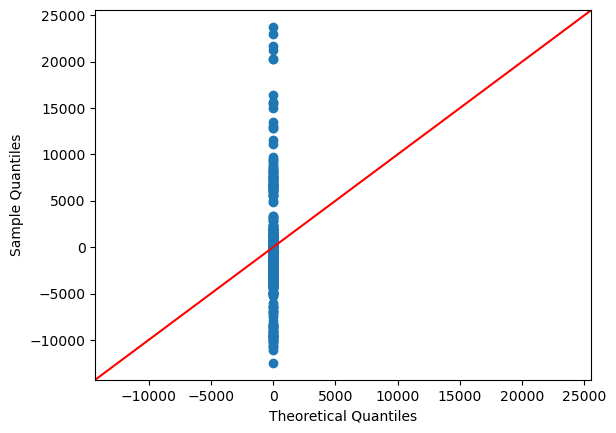

In [129]:
# Menampilkan QQ plot
sm.qqplot(y_test_residuals, line ='45')
plt.show()

Dari grafik QQ plot, terlihat bahwa data tidak menyebar dengan normal, terlihat bahwa ada penyimpangan yang cukup signifikan dari garis lurus, maka dapat disimpulkan bahwa asumsi 3 tidak terpenuhi.

## Asumsi 4: Tidak ada auto-correlation

In [130]:
# Menggunakan Durbin-Watson test
durbin_watson(y_test_residuals)

array([1.93861035])

Karena hasil Durbin-Watson test nya adalah 1.93861035, yaitu masih dalam range 1.5 sampai 2.5, maka dapat disimpulkan bahwa tidak ada korelasi antar nilai error, maka asumsi 4 terpenuhi.

## Asumsi 5: Mengecek homoscedasticity

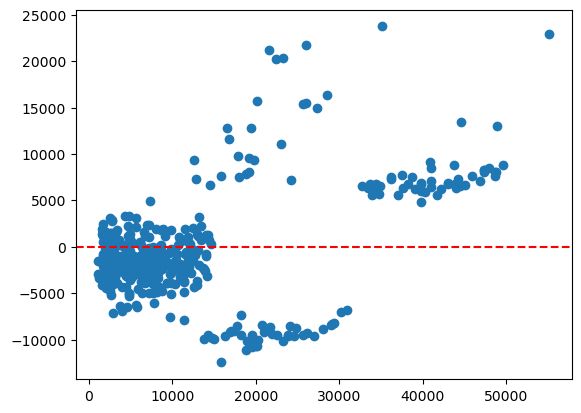

In [131]:
# Mengecek homoscedasticity
plt.scatter(y_test, y_test_residuals)
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.show()

Dari grafik homoscedasticity, dilihat bahwa error nya tidak konstan, yaitu berarti adalah heteroscedasticity dan asumsi 5 tidak terpenuhi.

# Model Saving

In [132]:
# Save Files
with open('list_num_cols.txt', 'w') as file_1:
  json.dump(num_columns, file_1)

with open('list_cat_cols.txt', 'w') as file_2:
  json.dump(cat_columns, file_2)

with open('scaler.pkl', 'wb') as file_3:
  pickle.dump(scaler, file_3)

with open('onehot_encoder.pkl', 'wb') as file_4:
  pickle.dump(onehot_encoder, file_4)

with open('model_linreg.pkl', 'wb') as file_6:
  pickle.dump(model_linreg, file_6)

# Kesimpulan

Pada dataset insurance.csv dilakukan EDA sebanyak 3, yang pertama untuk melihat jumlah orang berdasarkan setiap kelas BMI, dimana hasilnya adalah para pemilik asuransi kebanyakan tidak overweight, namun jumlah orang yang memiliki overweight kelas 1 juga lumayan banyak, maka dari itu perlu untuk diperhatikan. Urutannya adalah not overweight, overweight class 1, overweight class 2, dan overweight class 3. Orang dengan overweight cenderung lebih banyak bisa menunjukkan risiko kesehatan yang lebih tinggi yang dapat meningkatkan biaya asuransi.

Kedua, didapatkan informasi bahwa pemilik asuransi lebih banyak yang berjenis kelamin laki-laki, dan berdasarkan EDA ketiga, laki-laki lebih banyak yang menjadi perokok. Dapat diketahui juga, bahwa pemilik asuransi kebanyakan bertempat tinggal di southeast.

Model linear regression yang dibuat untuk memprediksi biaya asuransi (variabel charges) menunjukkan hasil yang cukup memuaskan berdasarkan nilai RMSE dan R2 Score. Nilai RMSE memberikan gambaran mengenai deviasi rata-rata antara biaya asuransi yang diprediksi dan yang sebenarnya, yang penting dalam konteks finansial untuk mengetahui seberapa besar kesalahan prediksi yang mungkin terjadi.

Nilai RMSE pada data train adalah 6144.021061206951, yang menandakan bahwa prediksi biaya asuransi dapat menyimpang rata-rata sekitar 6144.021061206951 dari nilai sebenarnya, sedangkan pada data test, RMSE lebih baik lagi, yaitu 5766.439735958241, yang mengindikasikan prediksi yang lebih akurat pada data yang tidak dikenal model (good fit). Selain itu, R2 Score yang didapatkan adalah 0.73 untuk data train dan 0.78 untuk data test, menyatakan bahwa model mampu menjelaskan sekitar 73% hingga 78% dari variabel dalam biaya asuransi, hal ini menandakan bahwa feature yang dipilih sudah dapat menjelaskan target dengan baik.

Feature-feature yang mempengaruhi biaya asuransi adalah age, bmi, dan smoker dibuktikan dengan nilai korelasinya yang tinggi. Dari nilai slopenya, dapat dilihat bahwa semakin tinggi umur dan nilai bmi nya, maka biaya asuransinya juga semakin tinggi, namun untuk smoker, orang yang tidak merokok akan mengalami pengurangan biaya asuransi, sehingga biaya nya menjadi lebih rendah dibandingkan dengan orang yang merokok.

Dari 5 asumsi yang ada pada model linear regression, hanya 2 asumsi yang terpenuhi, yaitu asumsi 2 dan 4. Maka, dapat disimpulkan bahwa model linear regression tidak cocok digunakan untuk dataset insurance.csv.

Untuk model prediksi yang lebih baik, disarankan untuk memperbanyak data, agar model dapat belajar dengan lebih baik. Kemudian, disarankan untuk mengganti model dengan model regresi yang lain, karena model linear regression tidak cocok untuk dataset insurance.csv yang dibuktikan bahwa hanya 2 asumsi linear regression yang terpenuhi.